<a href="https://colab.research.google.com/github/ruanomiguel/Miguel-Alejandro-Ruano-Q-Talento-tech/blob/main/trabajoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Análisis  de Cáncer de Mama**

---



**Descripción General del Dataset**
El dataset utilizado es el conjunto de datos de cáncer de mama de sklearn (load_breast_cancer). Este es un conjunto de datos comúnmente usado para tareas de clasificación en aprendizaje automático.

**Características del Dataset**

El dataset contiene características numéricas extraídas de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas mamarias.
Incluye un total de 30 características numéricas.
La variable objetivo es binaria: maligno (1) o benigno (0).

**Características Numéricas**
las características incluyen:

mean perimeter (perímetro medio)

mean symmetry (simetría media)

mean texture (textura media)

Entre otras (el dataset completo incluye 30 características)

**Características Categóricas**

Diagnóstico: Es la única característica categórica, derivada de la variable objetivo (0 para benigno, 1 para maligno).

**Objetivo del Proyecto**

El objetivo principal es desarrollar un modelo de clasificación para predecir si una masa mamaria es maligna o benigna basándose en las características extraídas de las imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn. datasets import load_breast_cancer
datos = load_breast_cancer()
datos

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df = pd.DataFrame(datos.data, columns = datos.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
datos.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df['Diagnostico']= datos.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
columnas = df.columns.values
print(columnas)
#columnas = ['mean perimeter', 'mean symmetry', 'Diagnostico']
MC = np.corrcoef(df[columnas].values.T)
print(MC)
#sns.set()
#sns.heatmap(MC, yticklabels = columnas, xticklabels=columnas, cbar=True, annot=True)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'Diagnostico']
[[ 1.00000000e+00  3.23781891e-01  9.97855281e-01  9.87357170e-01
   1.70581187e-01  5.06123578e-01  6.76763550e-01  8.22528522e-01
   1.47741242e-01 -3.11630826e-01  6.79090388e-01 -9.73174431e-02
   6.74171616e-01  7.35863663e-01 -2.22600125e-01  2.05999980e-01
   1.94203623e-01  3.76168956e-01 -1.04320881e-01 -4.26412691e-02
   9.69538973e-01  2.97007644e-01  9.65136514e-01  9.41082460e-01
   1.19616140e-01  4.13462823e-01 

In [7]:
correlation_df = pd.DataFrame(MC, index=columnas, columns=columnas)

# Filtrar los datos mayores a 0.6
filtered_correlation_df = correlation_df[correlation_df > 0.6]

# Mostrar solo los datos que cumplen la condición
print(filtered_correlation_df)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000           NaN        0.997855   0.987357   
mean texture                     NaN      1.000000             NaN        NaN   
mean perimeter              0.997855           NaN        1.000000   0.986507   
mean area                   0.987357           NaN        0.986507   1.000000   
mean smoothness                  NaN           NaN             NaN        NaN   
mean compactness                 NaN           NaN             NaN        NaN   
mean concavity              0.676764           NaN        0.716136   0.685983   
mean concave points         0.822529           NaN        0.850977   0.823269   
mean symmetry                    NaN           NaN             NaN        NaN   
mean fractal dimension           NaN           NaN             NaN        NaN   
radius error                0.679090           NaN        0.691765   0.732562   
texture error               

In [8]:
indices = np.where(MC > 0.6)

# Obtener las columnas correspondientes a esos índices
columnas = df.columns.values

# Recorrer los índices y mostrar qué columnas tienen correlaciones mayores que 0.6
for i, j in zip(indices[0], indices[1]):
    if MC[i, j] > 0.6:  # Si el valor es mayor que 0.6
        print(f"La correlación entre '{columnas[i]}' y '{columnas[j]}' es mayor que 0.6: {MC[i, j]}")

La correlación entre 'mean radius' y 'mean radius' es mayor que 0.6: 1.0
La correlación entre 'mean radius' y 'mean perimeter' es mayor que 0.6: 0.9978552814938105
La correlación entre 'mean radius' y 'mean area' es mayor que 0.6: 0.9873571700566127
La correlación entre 'mean radius' y 'mean concavity' es mayor que 0.6: 0.6767635503908118
La correlación entre 'mean radius' y 'mean concave points' es mayor que 0.6: 0.8225285223871797
La correlación entre 'mean radius' y 'radius error' es mayor que 0.6: 0.6790903880020752
La correlación entre 'mean radius' y 'perimeter error' es mayor que 0.6: 0.6741716157641054
La correlación entre 'mean radius' y 'area error' es mayor que 0.6: 0.7358636632128176
La correlación entre 'mean radius' y 'worst radius' es mayor que 0.6: 0.9695389726112063
La correlación entre 'mean radius' y 'worst perimeter' es mayor que 0.6: 0.965136513955987
La correlación entre 'mean radius' y 'worst area' es mayor que 0.6: 0.9410824595860466
La correlación entre 'mean r

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'Diagnostico']


<Axes: >

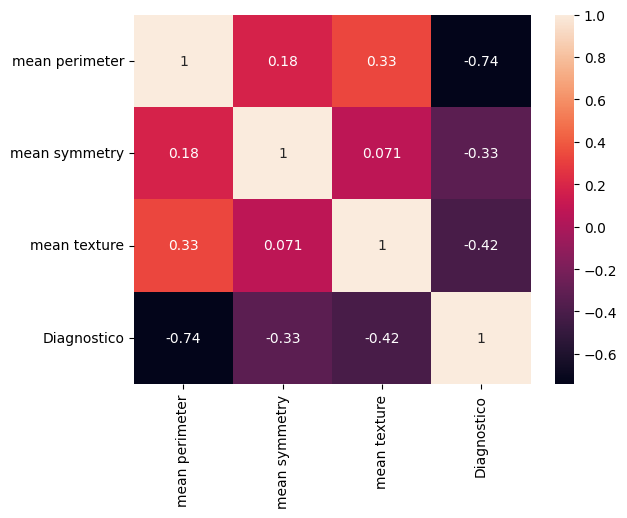

In [9]:
import seaborn as sns
columnas = df.columns.values
print(columnas)
columnas = ['mean perimeter', 'mean symmetry','mean texture', 'Diagnostico']
MC = np.corrcoef(df[columnas].values.T)
#print(MC)
#sns.set()
sns.heatmap(MC, yticklabels = columnas, xticklabels=columnas, cbar=True, annot=True)

In [10]:
df_filtrado = df[columnas]
df_filtrado

,mean perimeter,mean symmetry,mean texture,Diagnostico
0,122.80,0.2419,10.38,0
1,132.90,0.1812,17.77,0
2,130.00,0.2069,21.25,0
3,77.58,0.2597,20.38,0
4,135.10,0.1809,14.34,0
...,...,...,...,...
564,142.00,0.1726,22.39,0
565,131.20,0.1752,28.25,0
566,108.30,0.1590,28.08,0
567,140.10,0.2397,29.33,0


In [11]:
x = df_filtrado.drop(['Diagnostico'], axis=1)
y = df['Diagnostico']
y

,Diagnostico
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [12]:
nombre = input(" Su nombre es: ")
meanperimeter= input("")
meansymmetry= input("")
meantexture= input("")

 Su nombre es: James
1
0
1


In [13]:
from sklearn.linear_model import LogisticRegression #Importamos algoritmo de regrecion lineal

modelo = LogisticRegression()
modelo.fit(x,y)

LogisticRegression()

In [14]:
y_predicion = modelo.predict(x)

In [15]:
dato_entrada = pd.DataFrame([[meanperimeter, meansymmetry, meantexture]],columns=['mean perimeter', 'mean symmetry','mean texture'])
dato_entrada

,mean perimeter,mean symmetry,mean texture
0,1,0,1


In [16]:


prediccion = modelo.predict(dato_entrada)
prediccion

array([1])

In [18]:
if (prediccion ==1):
  print(f"{prediccion} Es maligno")
else:
  print(f"{prediccion} Es benigno")

[1] Es maligno


#**Resumen del Análisis**

Se cargó el dataset de cáncer de mama y se convirtió en un DataFrame de pandas.
Se realizó un análisis de correlación entre las características, enfocándose en 'mean perimeter', 'mean symmetry', 'mean texture' y el diagnóstico.
Se creó un mapa de calor para visualizar las correlaciones.
Se implementó un modelo de regresión logística utilizando las características seleccionadas.
Se desarrolló una interfaz simple para que el usuario pueda ingresar valores y obtener una predicción.



#**Conclusión General**
El análisis sugiere utilizar características como el perímetro medio, la simetría media y la textura media para predecir si una masa mamaria es maligna o benigna. El modelo de regresión logística implementado permite hacer predicciones basadas en estos valores de entrada.
Es importante notar que este es un análisis básico y que para aplicaciones en el mundo real, se necesitaría una evaluación más rigurosa del modelo, incluyendo métricas de rendimiento, validación cruzada y posiblemente la consideración de otros algoritmos de clasificación, si es posible se deja estas actividades para posteriormente implementarlas y completar proyecto personal.